# 14. 단순 선형 회귀 (Simple Linear Regression)

참고 : 
- https://learning.oreilly.com/library/view/data-science-from/9781491901410/ch14.html#simple_linear_regression
- https://en.wikipedia.org/wiki/Linear_regression
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
- https://en.wikipedia.org/wiki/Residual_sum_of_squares

In [1]:
%matplotlib inline

## 라이브러리 Import

In [3]:
from __future__ import division
from collections import Counter, defaultdict

from linear_algebra import vector_subtract
from stats import mean, correlation, standard_deviation, de_mean
from gradient_descent import minimize_stochastic

import math, random

In [48]:
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [49]:
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

# 1. 단순 선형 모델

$$
\huge y_{i} 
= \alpha + \beta {x_{i}} + \epsilon_{i}
= \hat{y_i} + \epsilon_{i}
$$
where 

- $\large y_{i}$ : 사용자 i가 매일 사이트에서 보내는 시간(분).

- $\large x_{i}$ : 사용자 i의 사이트 가입 친구수.

- $\large \epsilon_{i}$ : 모델 추정에서 발생하는 오류.


In [50]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

![Simple Linear Regression.](https://learning.oreilly.com/library/view/data-science-from/9781491901410/assets/dsfs_1401.png)

# 2. Cost 를 최소화하는 방법은? 

***


## 최소자승법 (least square solution) 이란 ?

predict 함수를 이용하면 $\alpha$, $\beta$ 가 주어지면 $x$가 주어졌을 때, $y$ 값을 예측할 수 있다.

그렇다면  $\alpha$ 와 $\beta$는 어떻게 선택할 수 있을까?

최소자승법이라 $x$, $y$ 가 주어졌을 때, sum_of_squared_errors ($\large\Sigma{ e_i^2}$)를 최소화해 주는 $\alpha$ 와 $\beta$ 값을 찾는 것을 의미한다.

In [51]:
def error(alpha, beta, x_i, y_i):
    """the error from predicting beta * x_i + alpha
    when the actual value is y_i"""
    return y_i - predict(alpha, beta, x_i)

In [52]:
def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

# 3. Ordinary Least Square

미분(또는 대수학)을 이용한 방법

미분 또는 대수학을 사용하면 오류를 최소화하는 $\alpha$ 와 $\beta$를 찾을 수 있다.


### beta : 

$
\Large \hat{\beta} = \frac{Cov(x,y)}{Var(x)} 
$

$
 \Large = \frac{E[(X - \mu)(Y - \nu)] }{E [ (X - \mu)^2 ] } 
$

$
 \Large 
 = \frac{E[(X - \mu)(Y - \nu)]}{\sqrt{E[(X - \mu)^2]} \sqrt{E[(Y - \nu)^2]}} * \frac{\sqrt{E[(Y - \nu)^2]}}{\sqrt{E[(X - \mu)^2]}}
$

$
 \Large = Cor(X,Y) * \frac{\sigma_Y}{\sigma_X}
$



### alpha :

$
\Large \hat{\alpha} = \bar{y} - \hat{\beta} \bar{x} 
$


### correlation (X,Y) : 

1) x 와 y가 양의 상관관계인 경우 : 

- `x`의 1 표준편차($\mu±\sigma$)가 증가할 때마다, 예측치 `y` 또한 1 표준편차($\nu±\sigma$) 증가한다.

2) x 와 y가 음의 상관관계인 경우 (anticorrelated) :

- `x` 가 증가하면 `y` 는 감소한다.

3) x 와 y 상관관계가 0인 경우 (없는 경우) :

- `beta` 가 0인 경우. 
- `x` 의 값이 `y` 를 예측하는데 전혀 영향을 주지 않는다..

입력치 num_friends_good, daily_minutes_good 에 이를 적용해 보면 아래와 같다.

In [53]:
def least_squares_fit(x, y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [54]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)

print("alpha={}, beta={} ".format(alpha, beta) )

alpha=22.94755241346903, beta=0.903865945605865 



분석 결과 : alpha = 22.95 and beta = 0.903. 

`n` 명의 친구가 있는 사용자는 하루 평균 사이트에서 `22.95 + n * 0.903` 분을 보낸다는 것을 알 수 있다.

친구가 한 명도 없는 사용자도 하루 평균 23분을 보낸다.

친구가 1명 증가할 수록 하루 평균 1분더 사이트에 머무는 것을 알 수 있다.

# 4. 경사 하강법 : Gradient Descent

link : 
- https://en.wikipedia.org/wiki/Residual_sum_of_squares
- https://www.kaggle.com/residentmario/gradient-descent-with-linear-regression


Predict :

$$
\large \hat{y_i} = \alpha + \beta x_i
$$

RSS (Residual Sum of Squares) :

$$
\large 
\text{RSS} 
= \sum_{i=1}^n (y_i - (\alpha + \beta x_i) )^2
= \sum_{i=1}^n (y_i - \hat{y_i} )^2
$$


The gradient is:

$$\large 
\Big< \frac{\partial}{\partial \alpha}(\text{RSS}),  \frac{\partial}{\partial \beta}(\text{RSS}) \Big> 
= \Big< -2\sum_{i=1}^n(y_i - \hat{y_i}), -2\sum_{i=1}^n x_i(y_i - \hat{y_i} ) \Big>$$

In [55]:

# error
def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

# gradient
def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),       # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i]    # beta partial derivative

# choose random value to start
random.seed(0)

theta = [random.random(), random.random()]

alpha, beta = minimize_stochastic(squared_error,
                                  squared_error_gradient,
                                  num_friends_good,
                                  daily_minutes_good,
                                  theta,
                                  0.0001)

print ("alpha={}, beta={}".format(alpha,beta))

alpha=22.93746417548679, beta=0.9043371597664965


Using the same data we get alpha = 22.93, beta = 0.905, which are very close to the exact answers.

In [56]:
r_squared(alpha, beta, num_friends_good, daily_minutes_good)  

0.32910726440432514

# 5. 모델 적합성 측정

***

모델이 주어진 데이터에 얼마나 적합한지 알아 보자.

그래프를 살펴보는 것보다 더 좋은 방법이 필요한데, 보통 결정계수(R제곱값)라는 수치를 사용한다.

결정계수란 종속 변수의 총 변화량 중 모델이 잡아낼 수 있는 변화량의 비율을 의미한다.

## 1) Visualization

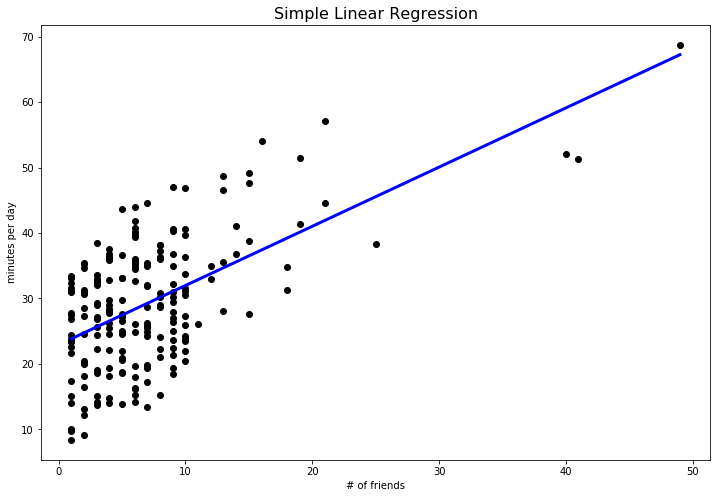

In [57]:

import matplotlib.pyplot as plt
import numpy as np

daily_minutes_good_predict=[predict(alpha, beta, x) for x in num_friends_good]

f, (ax1) = plt.subplots(1, 1, figsize=(12, 8))
#t = f.suptitle('Simple Linear Regression', fontsize=18)
#f.subplots_adjust(top=0.85, wspace=0.3)

ax1.scatter(num_friends_good, daily_minutes_good, color='black', label='')
ax1.plot(num_friends_good, daily_minutes_good_predict, color='blue', linewidth=3)
ax1.set_ylabel('minutes per day')
ax1.set_xlabel('# of friends')
ax1.set_xticks(np.arange(0, 51, 10))
ax1.set_title('Simple Linear Regression', fontsize=16)
#l1 = ax1.legend(loc="best")

plt.show()

## 2) R-squared

모델이 주어진 데이터에 얼마나 적합한지 측정 필요.

R-squared (coefficient of determination) : 결정계수 (R 제곱값)

In [58]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
    
def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""

    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

r_squared(alpha, beta, num_friends_good, daily_minutes_good)      # 0.329

0.32910726440432514

최소자승법은 SSE(Sum of squared prediction errors) 를 최소화하는 `alpha` 와 `beta` 를 선택한다.

결정계수란 종속 변수의 총 변화량 중 모델이 잡아낼 수 있는 변화량의 비율을 의민한다.

R-sqaured 수치가 높으면 모델이 데이타를 좀 더 잘 추정한다고 볼 수 있다.

R-squared 수치가 0.329 이면, 만들어진 모델이 예측하는데 어느 정도 데이타에 적합하지만 다른 중요한 요소가 존재한다는 것을 의미한다.


# 6. 최대우도추정법 : Maximum Likelihood Estimation


## Likelihood

$\theta$ 에 의존하는 표본 분포 :

$$
\Large p(v_1, ... , v_n | \theta)
$$

Likelihood  : $\theta$ 는 likelihood 함수를 최대화해 주는 값.
관측된 데이타가 발생할 경우를 가장 높게 만들어 주는 값을 의미한다.

$$ \Large L(\theta | v_1,...,v_n) $$

## $ L_i(\alpha, \beta | x_i, y_i, \sigma) $

대부분의 회귀분석에서는 오류 평균이 0이고, 표준편차가 $\sigma$ 인 정규분포를 따른다고 가정한다.
이를 식으로 표한하면 아래와 같다.

$$
\large L_i(\alpha, \beta | x_i, y_i, \sigma)
= \frac{1}{\sqrt{2\pi\sigma}}\text{exp}(-\frac{(y_i - \hat{y_i} )^2}{2\sigma^2})
= \frac{1}{\sqrt{2\pi\sigma}}\text{exp}(-\frac{( \epsilon_i )^2}{2\sigma^2})
$$

전체 데이터에 대한 likelihood 는 각 데이터의 likelihood 를 모두 곱한 값이다.

오류의 제곱값을 최소값하는 것은 관측된 데이타가 발생할 likelihood 를 최대화하는 것과 동일하다.

## $exp(-\epsilon^2)$ 를 그래프로 표현하면

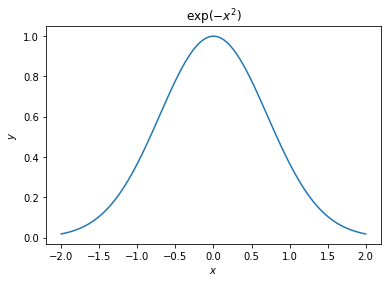

In [59]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100)
y = np.exp(-x*x)

plt.figure()
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\exp(-x^2)$')

plt.show()